In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler

In [11]:
df = pd.read_excel('эб2.xlsx', index_col='name')
df

,x1,x2,x3,x4,x5,x6
name,,,,,,
"АО ""МаксимаТелеком""",0.64,-51.3,60.7,26.3,17.8,60.1
"ПАО ""МТС""",0.51,1.5,13.8,8.9,16.5,28.0
"ПАО ""ВымпелКом"" (Билайн)",0.32,1.1,10.5,5.6,22.1,32.0
"ПАО ""МегаФон""",0.44,1.3,12.3,8.1,25.3,51.0
"ПАО ""Ростелеком""",0.55,1.8,7.9,4.3,19.2,38.0
"ООО ""Т2 РТК Холдинг"" (Tele2)",0.41,1.2,14.7,10.5,17.9,35.0
"АО ""ЭР-Телеком Холдинг""",0.47,9.8,6.7,14.5,9.1,42.0
"АО ""Транстелеком""",0.60,2.3,6.3,3.5,4.8,25.0
"ООО ""ГлобалТелеком""",0.34,0.9,17.8,11.9,7.3,29.0


In [15]:
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)
df
df.to_csv('эб2.csv')
data = pd.read_csv('эб2.csv', index_col='name')
data

,x1,x2,x3,x4,x5,x6
name,,,,,,
"АО ""МаксимаТелеком""",0.975597,-4.409721,3.796010,2.655862,1.073521,1.799136
"ПАО ""МТС""",0.060775,0.201254,-0.098514,-0.229110,0.877087,-0.553299
"ПАО ""ВымпелКом"" (Билайн)",-1.276272,0.166322,-0.372543,-0.776259,1.723266,-0.260160
"ПАО ""МегаФон""",-0.431822,0.183788,-0.223073,-0.361752,2.206797,1.132247
"ПАО ""Ростелеком""",0.342259,0.227453,-0.588444,-0.991803,1.285066,0.179547
"ООО ""Т2 РТК Холдинг"" (Tele2)",-0.642934,0.175055,-0.023779,0.036175,1.088632,-0.040307
"АО ""ЭР-Телеком Холдинг""",-0.220709,0.926085,-0.688090,0.699387,-0.241079,0.472685
"АО ""Транстелеком""",0.694113,0.271117,-0.721306,-1.124446,-0.890823,-0.773152
"ООО ""ГлобалТелеком""",-1.135531,0.148856,0.233641,0.268299,-0.513065,-0.480014


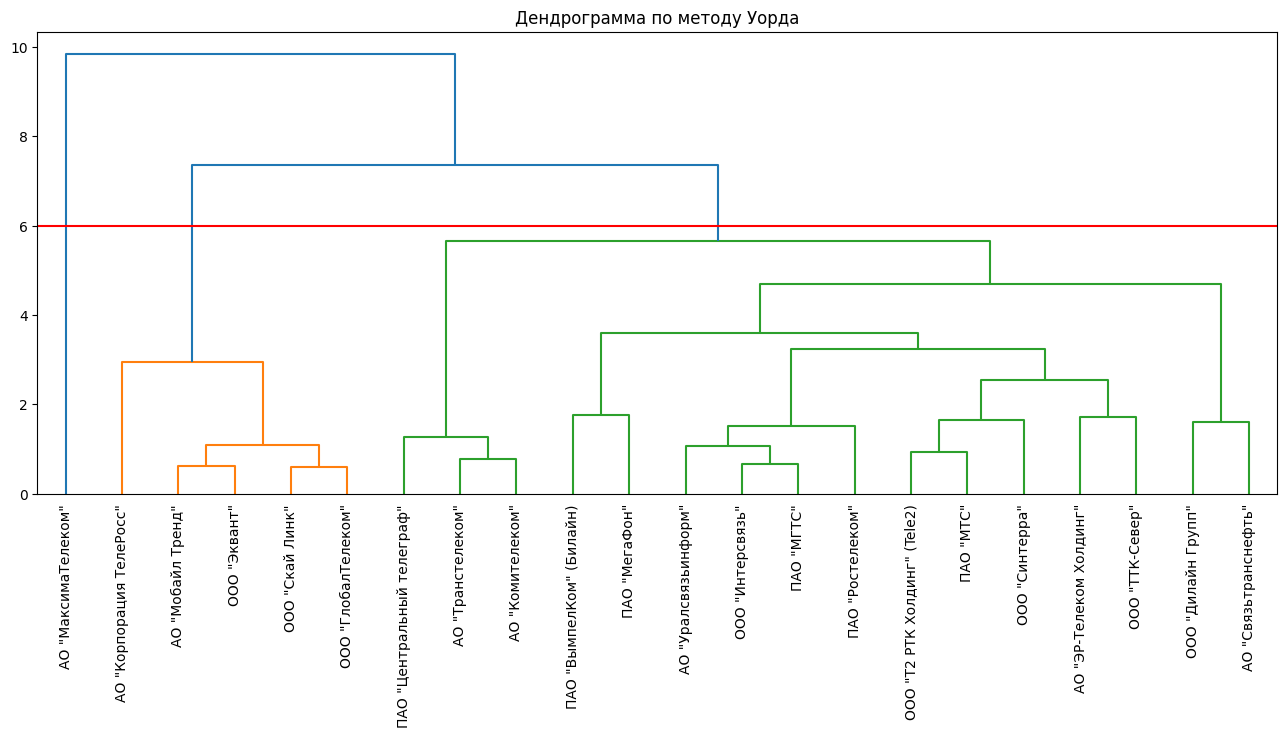

In [16]:
Z = hierarchy.linkage(data, method='ward', optimal_ordering=True)
plt.figure(figsize=(16,6))
hierarchy.dendrogram(Z, labels=data.index, leaf_rotation=90)
plt.title("Дендрограмма по методу Уорда")
plt.axhline(y=6, color='r', linestyle='-')
plt.show()

# индексы Калински и Харабаза (Дуды и Харта)

[np.float64(8.015331288164179), np.float64(12.740548657560105), np.float64(14.44424681661336), np.float64(12.528254665690081), np.float64(15.564520667898208), np.float64(15.381978690582791), np.float64(18.759075254512076), np.float64(17.20413250278474), np.float64(17.524868735718847)]


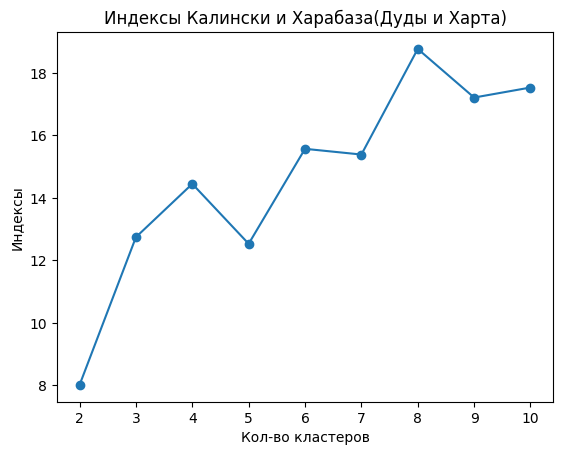

In [17]:
classes = range(2, 11)
scores = []
for n in classes:
    km = KMeans(n_clusters=n, random_state=12345).fit(data)
    labels = km.labels_
    scores.append(calinski_harabasz_score(data, labels))
print(scores)
plt.title("Индексы Калински и Харабаза(Дуды и Харта)")
plt.scatter(x=list(classes), y=scores)
plt.plot(classes, scores);
plt.xlabel("Кол-во кластеров")
plt.ylabel("Индексы")
plt.show()

In [26]:
km = KMeans(n_clusters=4, random_state=12345)
data['kmeans'] = km.fit_predict(data)
ward = AgglomerativeClustering(linkage='ward', n_clusters = 4)
data['ward'] = ward.fit_predict(data)
data['ward_calib'] = data['ward'].apply(lambda x: 0 if x==1 else 1 if x==0 else x)
data

,x1,x2,x3,x4,x5,x6,kmeans,ward,ward_calib
name,,,,,,,,,
"АО ""МаксимаТелеком""",0.975597,-4.409721,3.796010,2.655862,1.073521,1.799136,0,2,2
"ПАО ""МТС""",0.060775,0.201254,-0.098514,-0.229110,0.877087,-0.553299,1,0,1
"ПАО ""ВымпелКом"" (Билайн)",-1.276272,0.166322,-0.372543,-0.776259,1.723266,-0.260160,1,0,1
"ПАО ""МегаФон""",-0.431822,0.183788,-0.223073,-0.361752,2.206797,1.132247,1,0,1
"ПАО ""Ростелеком""",0.342259,0.227453,-0.588444,-0.991803,1.285066,0.179547,1,0,1
"ООО ""Т2 РТК Холдинг"" (Tele2)",-0.642934,0.175055,-0.023779,0.036175,1.088632,-0.040307,1,0,1
"АО ""ЭР-Телеком Холдинг""",-0.220709,0.926085,-0.688090,0.699387,-0.241079,0.472685,3,1,0
"АО ""Транстелеком""",0.694113,0.271117,-0.721306,-1.124446,-0.890823,-0.773152,2,3,3
"ООО ""ГлобалТелеком""",-1.135531,0.148856,0.233641,0.268299,-0.513065,-0.480014,3,1,0


In [31]:
data.groupby('kmeans', )
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
means = data.pivot_table(index=['kmeans'], values=features, aggfunc=['mean'])
means.columns = features
means

Q = pd.DataFrame(columns=['cluster', 'Q'])
results = []

for ind, group in data.groupby('kmeans'):
    summ = 0
    for index, row in group.iterrows():
        summ += ((row[features] - means.iloc[ind])**2).sum()
    print(summ)
    results.append({'cluster': f'№ {ind}', 'Q': summ})

Q = pd.DataFrame(results)
total_sum = Q['Q'].sum()
Q = pd.concat([Q, pd.DataFrame([{'cluster': 'SUM', 'Q': total_sum}])], ignore_index=True)
Q

0.0
24.022770369673786
1.1102938214873426
13.606440722094305


,cluster,Q
0,№ 0,0.000000
1,№ 1,24.022770
2,№ 2,1.110294
3,№ 3,13.606441
4,SUM,38.739505


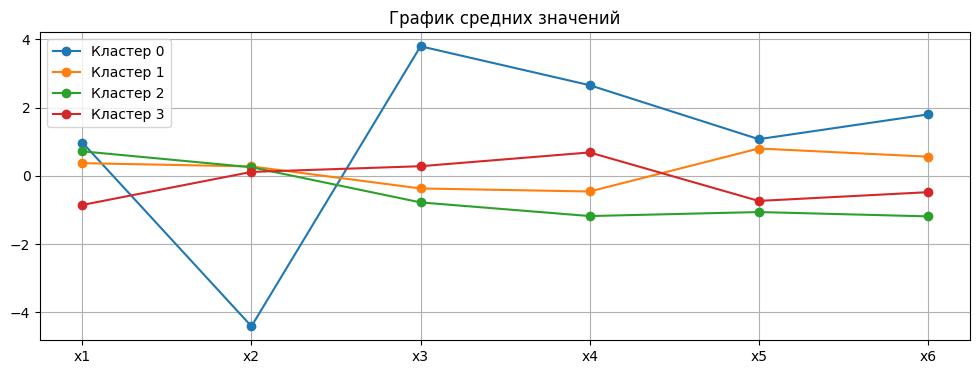

In [28]:
plt.figure(figsize=(12,4))
plt.title('График средних значений')
for n in range(means.shape[0]):
    plt.plot(features, means.iloc[n], marker='o', label='Кластер {}'.format(n))
plt.legend()
plt.grid()
plt.show()

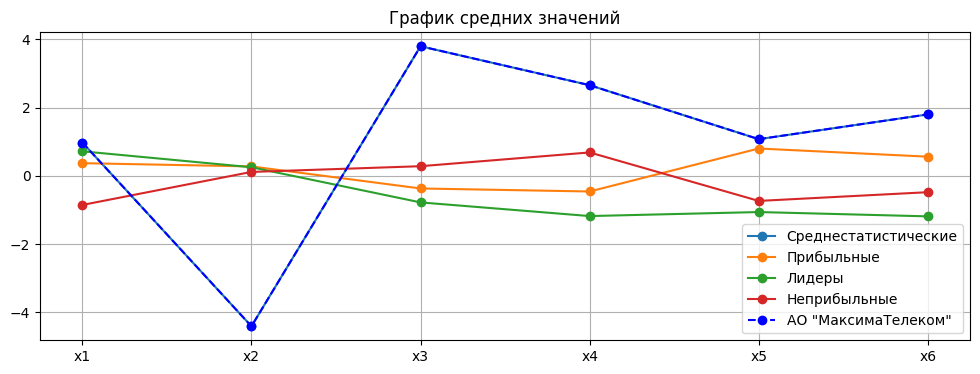

In [29]:
cluster_names = ['Среднестатистические', 'Прибыльные','Лидеры','Неприбыльные']
plt.figure(figsize=(12,4))
plt.title('График средних значений')
for n in range(means.shape[0]):
    plt.plot(features, means.iloc[n], marker='o', label=cluster_names[n])
plt.plot(features, data.loc['АО "МаксимаТелеком"'][features], 'bo--', label='АО "МаксимаТелеком"')
plt.legend()
plt.grid()
plt.show()